In [49]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clinical_df = mouse_df.merge(clinical_df, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_clinical_df.columns = ['MouseID','Drug','Timepoint','Tumor Volume (mm3)','Metastatic Sites']
mouse_clinical_df.sort_values('MouseID').head(5)

def creat_errorbar_plot(df_pivot, plot_title, plot_xlabel, plot_ylabel, plot_ylim):
    plot_df = df_pivot.reset_index()
    dics = []
    plot_x = plot_df['Timepoint']
    plot_names = ['Capomulin','Infubinol','Ketapril','Placebo']
    plot_colors = ['red', 'blue', 'green', 'black']
    plot_markers= ['o',6,'s','d']
    plot_error = [np.std(plot_df[plot_names[0]]),
                  np.std(plot_df[plot_names[1]]),
                  np.std(plot_df[plot_names[2]]),
                  np.std(plot_df[plot_names[3]])]
    
    fig, plot_fig = plt.subplots(figsize=(8,5))
    fig.suptitle(plot_title, fontsize='14')
    for i,drug in enumerate(plot_names):
        plot_fig.errorbar(plot_x, plot_df[drug], yerr=trt_error[i], fmt='.', color=plot_colors[i], marker=plot_markers[i], linestyle=':', ms='4', elinewidth=0.5)

    plot_fig.grid()
    plot_fig.set_xlabel(plot_xlabel)
    plot_fig.set_ylabel(plot_ylabel)
    if int(plot_ylim) > 0:
        plot_fig.set_ylim(0,plot_ylim)
    plot_fig.legend(loc='best')
    
    return plt.show()

## Tumor Response to Treatment

In [32]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
trt_mean_df = mouse_clinical_df
trt_mean_df = trt_mean_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
# Convert to DataFrame

# Preview DataFrame
trt_mean_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [33]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
trt_std_error_df = mouse_clinical_df
trt_std_error_df = trt_std_error_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
# Convert to DataFrame

# Preview DataFrame
trt_std_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [34]:
# Minor Data Munging to Re-Format the Data Frames
trt_minor_df = mouse_clinical_df
trt_minor_df = trt_minor_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
trt_minor_df_pivot = trt_minor_df.pivot(
    columns='Drug',
    index = 'Timepoint',
    values = 'Tumor Volume (mm3)'
)
# Preview that Reformatting worked
trt_minor_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


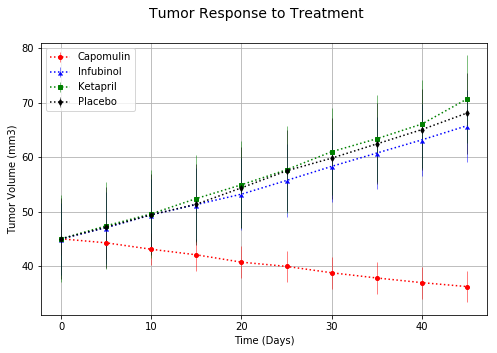

In [42]:
creat_errorbar_plot(trt_minor_df_pivot, 'Tumor Response to Treatment', 'Time (Days)', 'Tumor Volume (mm3)', 0)
# Save the Figure

In [43]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [44]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_dr = mouse_clinical_df
met_dr = met_dr.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index().set_index(['Drug','Timepoint'])
# Preview DataFrame
met_dr.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [45]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std_dr = mouse_clinical_df
met_std_dr = met_std_dr.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index().set_index(['Drug','Timepoint'])
# Preview DataFrame
met_std_dr.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [63]:
# Minor Data Munging to Re-Format the Data Frames
met_minor_df = mouse_clinical_df
met_minor_df = met_minor_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()


met_minor_df_pivot = met_minor_df.pivot(
columns='Drug',
    index='Timepoint',
    values='Metastatic Sites'
)
# Preview that Reformatting worked
met_minor_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


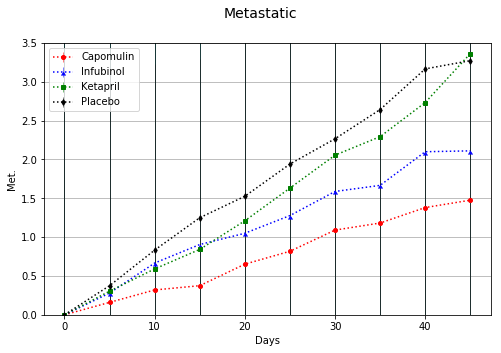

In [64]:
creat_errorbar_plot(met_minor_df_pivot, 'Metastatic', 'Days', 'Met.', 3.5)
# Show the Figure


## Survival Rates

In [55]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates_df = mouse_clinical_df
survival_rates_df = survival_rates_df.groupby(['Drug','Timepoint']).MouseID.count().reset_index()
survival_rates_df.columns = ['Drug', 'Timepoint', 'Mouse Count']
# Preview DataFrame
survival_rates_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [58]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_df_pivot = survival_rates_df.pivot(
columns='Drug',
    index='Timepoint',
    values='Mouse Count'
)
# Preview the Data Frame
survival_rates_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


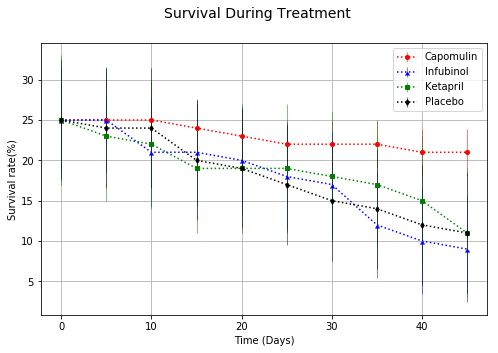

In [66]:
# Generate the Plot (Accounting for percentages)
creat_errorbar_plot(survival_rates_df_pivot, 'Survival During Treatment', 'Time (Days)', 'Survival rate(%)', 0)
# Show the Figure

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()